In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fc=pd.read_csv(r"C:\Users\DELL\Desktop\Data Science\DS Assignment\Random Forest\Fraud_check.csv")

In [5]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fc=pd.get_dummies(fc,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [8]:
fc["TaxInc"] = pd.cut(fc["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

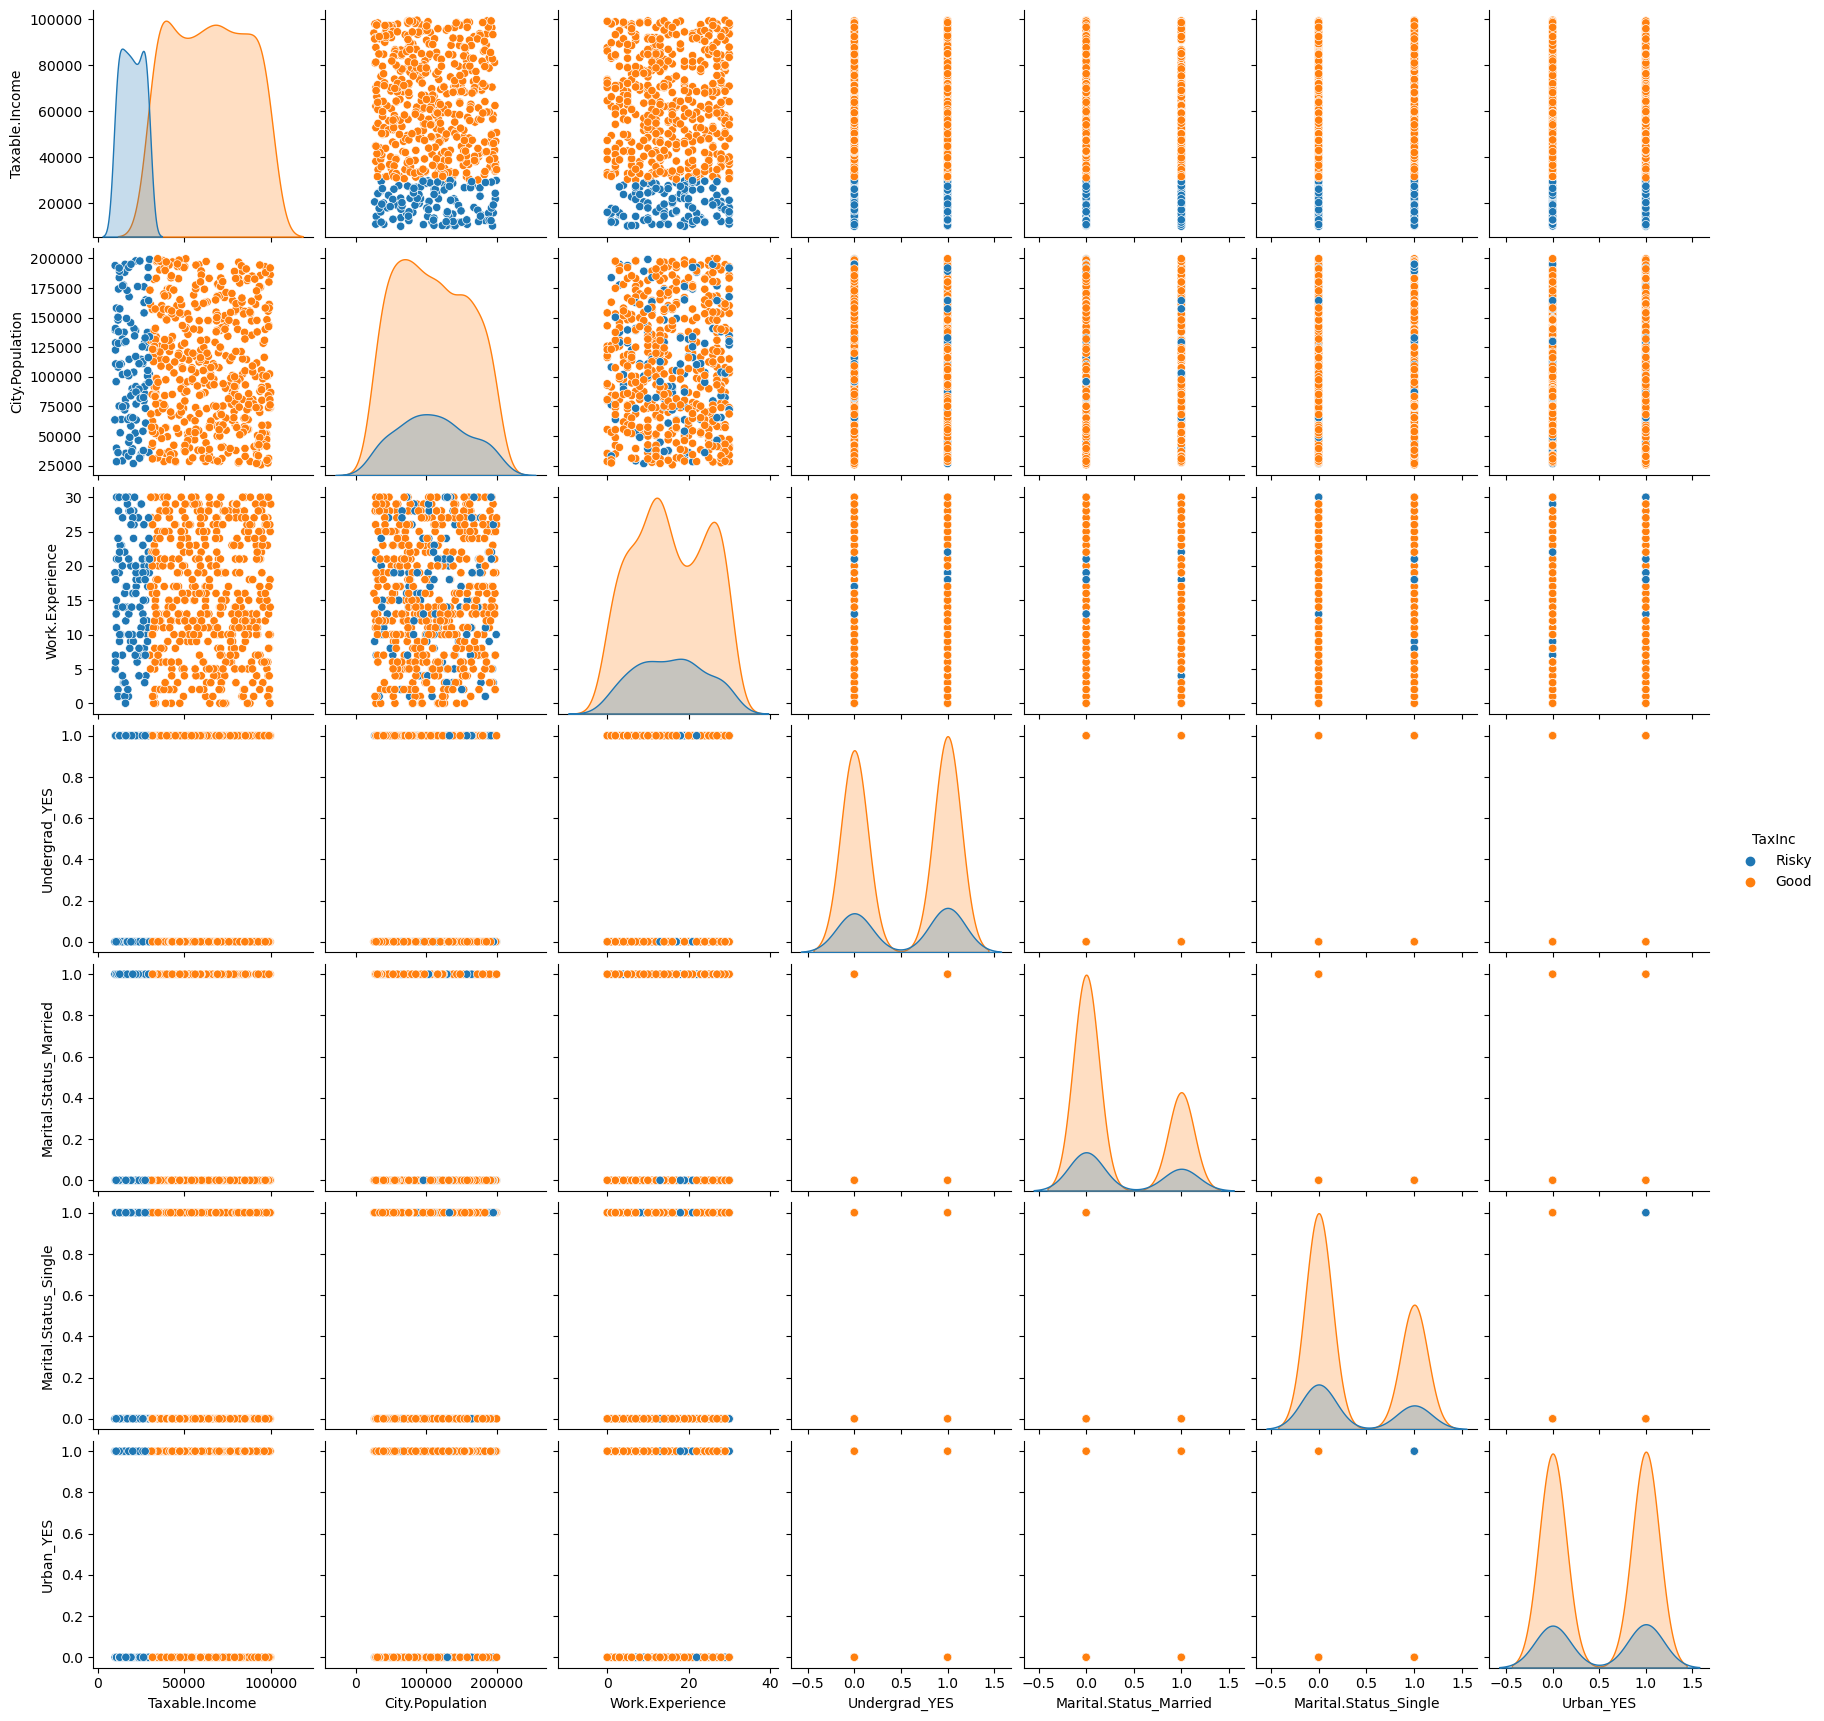

In [7]:
sns.pairplot(data=fc, hue = 'TaxInc')

In [9]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fc = pd.get_dummies(fc,columns = ["TaxInc"],drop_first=True)

In [10]:
fc.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [10]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital.Status_Married  600 non-null    uint8
 5   Marital.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   TaxInc_Good             600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


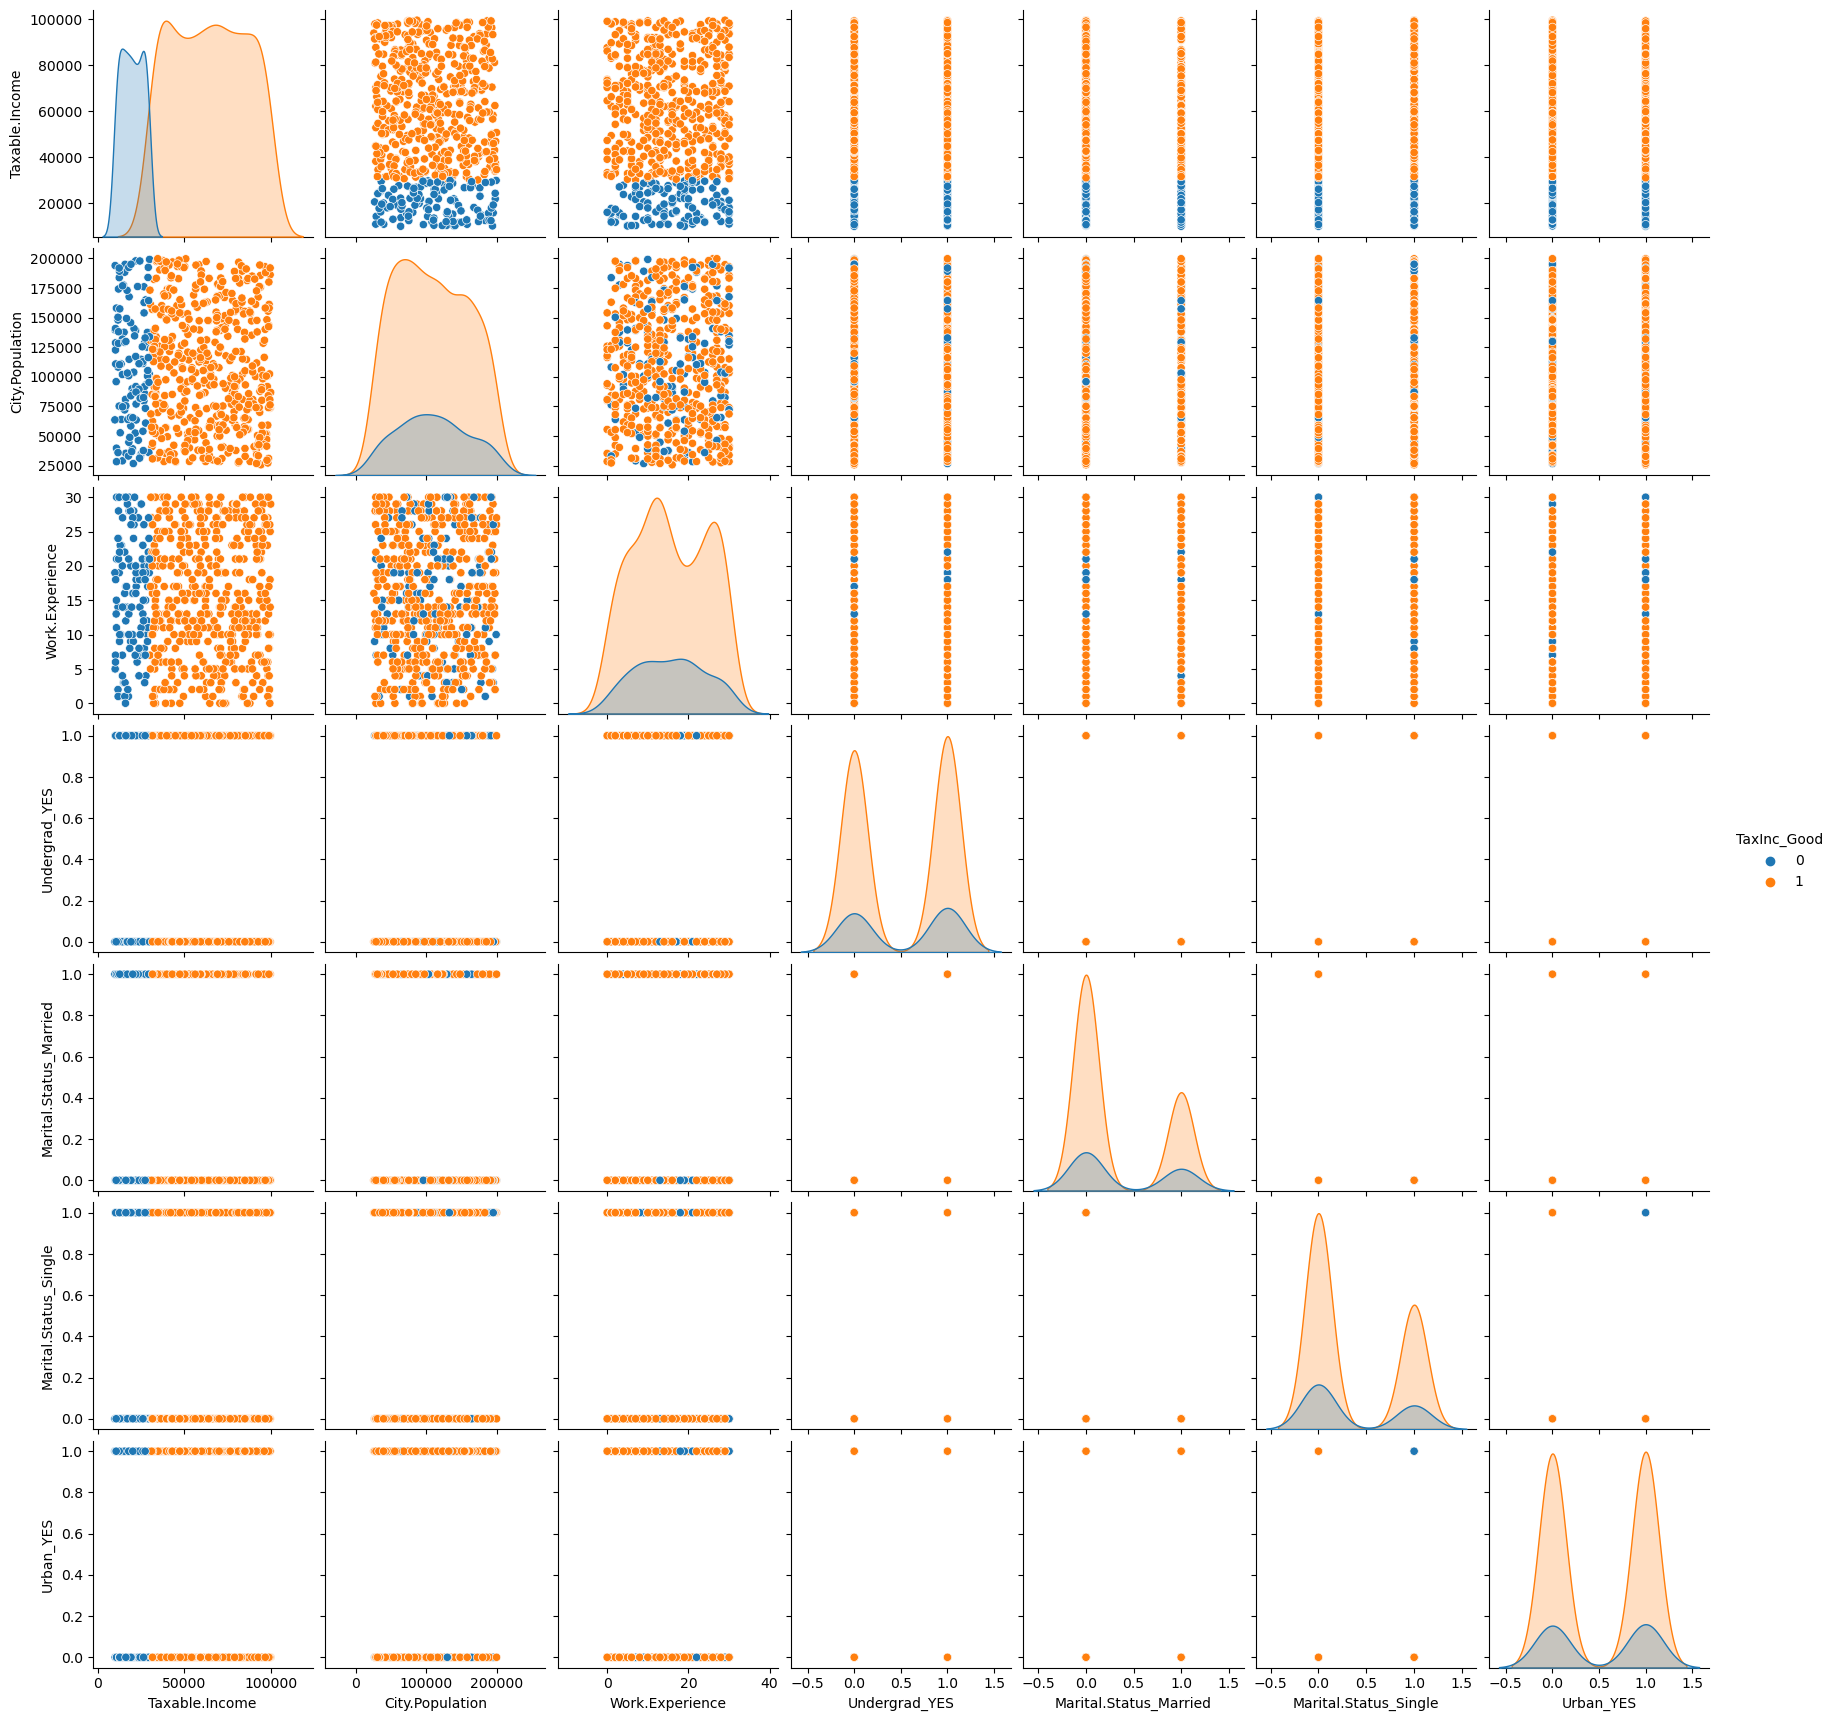

In [11]:
sns.pairplot(data=fc, hue = 'TaxInc_Good')

<AxesSubplot:>

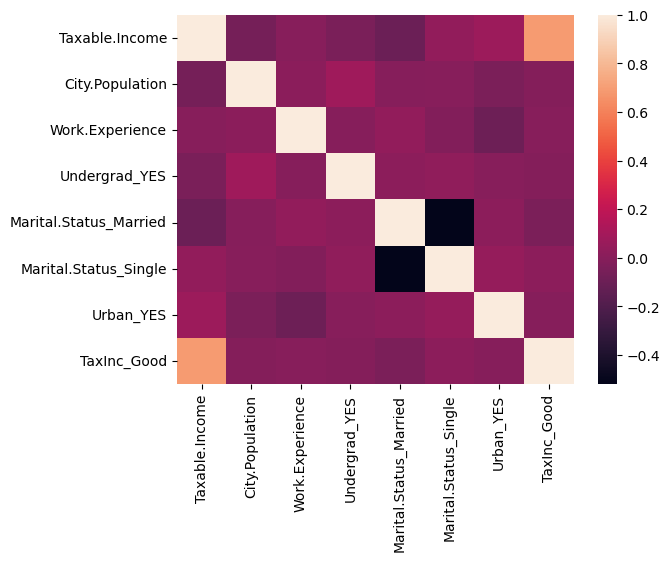

In [12]:
# correlation matrix
sns.heatmap(fc.corr())

(array([[ 63., 146., 125., 132., 134.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 8 BarContainer objects>)

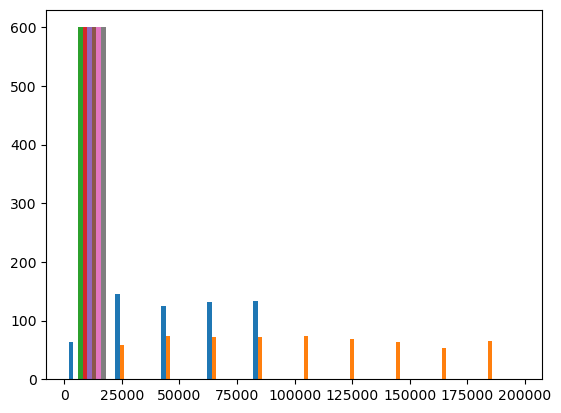

In [16]:
plt.hist(fc)

<Figure size 2000x2000 with 0 Axes>

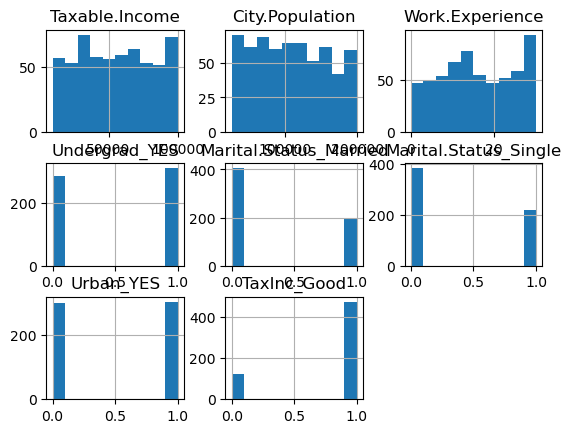

<Figure size 2000x2000 with 0 Axes>

In [17]:
fc.hist()
plt.figure(figsize =(20,20))

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(fc.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [14]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [15]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Creating new model testing with new parameters
forest_new = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [18]:
print('Train accuracy: {}'.format(forest_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(Xtest, ytest)))

Train accuracy: 0.8020833333333334
Test accuracy: 0.7916666666666666
